In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb

In [3]:
from ft_engineering import split_datos
from Cargar_datos import cargar_datos

Leyendo archivo desde: C:\Users\eazam\MLOps---DSPTM5\Base_de_datos.xlsx
Entrenando modelo: Logistic Regression...


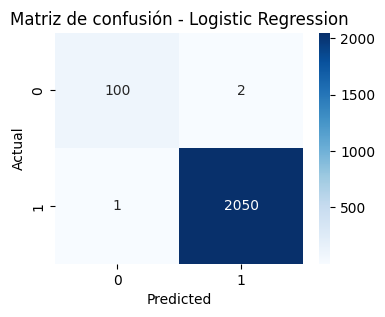

Entrenando modelo: SVC...


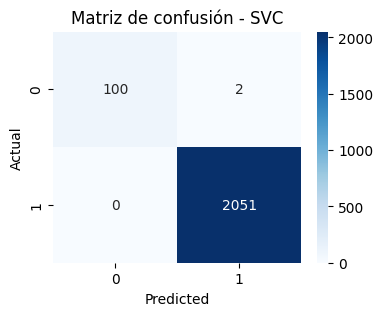

Entrenando modelo: Decision Tree...


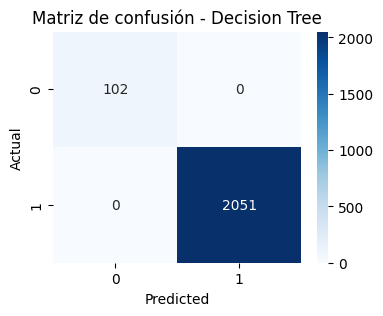

Entrenando modelo: Random Forest...


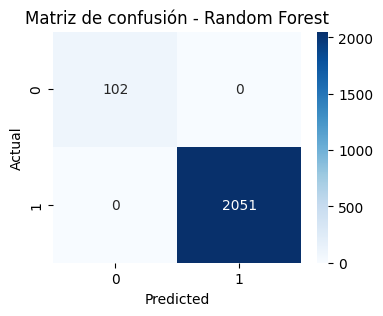

Entrenando modelo: XGBoost...


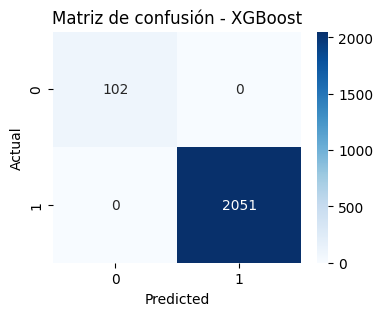

                Modelo  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.998607   0.999025  0.999512  0.999269
1                  SVC  0.999071   0.999026  1.000000  0.999513
2        Decision Tree  1.000000   1.000000  1.000000  1.000000
3        Random Forest  1.000000   1.000000  1.000000  1.000000
4              XGBoost  1.000000   1.000000  1.000000  1.000000


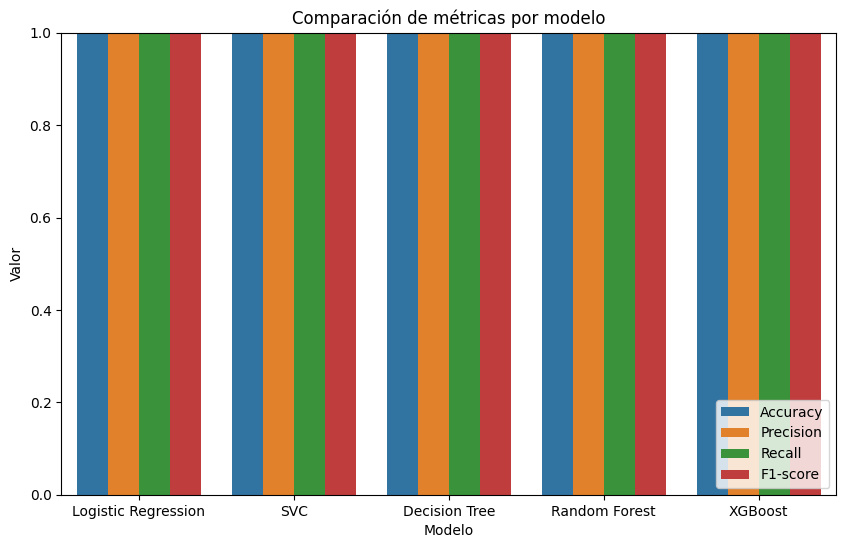

In [4]:
# CARGAR Y PREPARAR DATOS
df = cargar_datos()
X_train, X_test, y_train, y_test, preprocessor = split_datos(df)

# DEFINIR MODELOS
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42)
}

# ENTRENAR Y EVALUAR MODELOS
resultados = []

for nombre, modelo in modelos.items():
    print(f"Entrenando modelo: {nombre}...")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    resultados.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# COMPARAR RESULTADOS
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# Gráfico comparativo
df_resultados_melted = df_resultados.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")
plt.figure(figsize=(10,6))
sns.barplot(x="Modelo", y="Valor", hue="Métrica", data=df_resultados_melted)
plt.title("Comparación de métricas por modelo")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()



In [5]:
import joblib

# Supongamos que XGBoost fue el mejor
mejor_modelo = modelos["XGBoost"] 

# Guardar objetos
joblib.dump(mejor_modelo, 'modelo_riesgo.pkl')
joblib.dump(preprocessor, 'preprocesador.pkl')
# Guardar X_train para tener la referencia del PSI (la base de comparación)
pd.DataFrame(X_train).to_csv('data_referencia.csv', index=False)